In [1]:
import urllib.request
from bs4 import BeautifulSoup as soup
import requests
import re
import pandas as pd
import dataframe_image as dfi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

rallyname = 'Portugal'

link = 'https://rally-base.com/2023/vodafone-rally-de-portugal-2023/?ssId='
startat, no_ss=7519, int(19) # starting number of url, count of Special Stages

canceled = []

stages = [number for number in range(no_ss)]


rally_23 = []

In [2]:
if canceled:
    for j in canceled: stages.remove(j-1)
#print(stages)


In [3]:
for ss in stages:
    val= startat + ss
    ss_a = str(val)
    my_url11 = link + ss_a
    #print(ss, val, ss_a, "\n", my_url11)
    
    req = urllib.request.Request(my_url11, headers={'User-Agent': 'Mozilla/5.0'})
    uClient11 = urllib.request.urlopen(req)
    page_html11 = uClient11.read()
    uClient11.close()
    data = pd.read_html(page_html11)[1]
   
    data.columns = data.iloc[0]
    data = data[1:]
    data['ss']=ss+1
    #print(data.columns)
    
    equal = '-' in data['Pos.'].unique()
    if equal:
        data['Pos.'] = data['Pos.'].replace('-', method='ffill')
    
    #data.to_csv('05_rally23_SS'+str(ss+1)+'.csv', index=False)

    rally_23.append(data)

In [4]:
rally2023_stages = pd.concat(rally_23, axis=0)
#rally2023_stages['Pos.'] = rally2023_stages['Pos.'].astype(str).astype(int)
rally2023_stages['No.'] = rally2023_stages['No.'].astype(str).astype(int)
#rally2023_stages.to_csv('03_rally2023.csv', index=False)
rally2023_stages = rally2023_stages.fillna("-")
rally2023_stages = rally2023_stages.rename(columns={'Driver / Co-driver Vehicle': "Crew"})
rally2023_stages['Race'] = rallyname
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:10]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally2023_stages

,Pos.,No.,Crew,Group,SS time,Aver. speed sec/km,Diff.Leader Diff.Prev.,ss,Race,cou
1,1,7,Loubet P.,RC1,00:09:02.7,79.80 0.00,00:00:00.0 00:00:00.0,1,Portugal,1
2,2,6,Sordo Dan,RC1,00:09:03.0,79.76 0.02,00:00:00.3 00:00:00.3,1,Portugal,2
3,3,8,Tänak Ott,RC1,00:09:05.0,79.46 0.19,00:00:02.3 00:00:02.0,1,Portugal,3
4,4,69,Rovanperä,RC1,00:09:05.3,79.42 0.22,00:00:02.6 00:00:00.3,1,Portugal,4
5,5,18,Katsuta T,RC1,00:09:06.1,79.30 0.28,00:00:03.4 00:00:00.8,1,Portugal,5
...,...,...,...,...,...,...,...,...,...,...
43,43,65,Al-Attiyah,RC2,00:08:42.7,76.99 12.18,00:02:16.2 00:00:17.6,19,Portugal,43
44,44,102,Salin Max,RC5,00:08:44.5,76.73 12.35,00:02:18.0 00:00:01.8,19,Portugal,44
45,45,100,Pereira M,RC4,00:08:58.4,74.75 13.59,00:02:31.9 00:00:13.9,19,Portugal,45
46,46,77,Serrano J,RC4,00:09:27.6,70.91 16.20,00:03:01.1 00:00:29.2,19,Portugal,46


In [5]:
rally2023_stageClass=rally2023_stages.drop(['Aver. speed sec/km', 'Diff.Leader Diff.Prev.', 'SS time', 'cou'], axis=1)
rally2023_stageTimes=rally2023_stages.drop(['Aver. speed sec/km', 'Diff.Leader Diff.Prev.', 'Pos.', 'cou'], axis=1)
rally2023_ClassView = rally2023_stageClass.set_index(['No.', 'Crew','Group','ss','Race'], drop=True).unstack('ss')
rally2023_TimeView = rally2023_stageTimes.set_index(['No.', 'Crew','Group', 'ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView = rally2023_ClassView.fillna("-")
rally2023_TimeView = rally2023_TimeView.fillna("-")
rally2023_stageClass2 = rally2023_stageClass.loc[((rally2023_stageClass['Group'] == 'RC1') | (rally2023_stageClass['Group'] == 'RC2'))] 
rally2023_ClassView2 = rally2023_stageClass2.set_index(['No.','Crew','Group','ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView2 = rally2023_ClassView2.fillna("-")


In [6]:
rally2023_ClassView.to_csv(str(rallyname) +'_Stages_Classification.csv')
rally2023_TimeView.to_csv(str(rallyname) + '_Stages_Times.csv',index=False)

In [7]:
pd.set_option("display.max_columns", None)

dfi.export(rally2023_ClassView2, (str(rallyname) + '_Stages_Classification.jpg'))


In [8]:
rally2023_ClassView

0                             Pos.                                          \
ss                              1   2   3   4   5   6   7   8   9   10  11   
No. Crew       Group Race                                                    
4   Lappi  Esa RC1   Portugal    6   7   7   1   5   5   1   5   2   3   5   
6   Sordo  Dan RC1   Portugal    2   2   4   2   3   2   6   1   3   6   3   
7   Loubet  P. RC1   Portugal    1   5   6   3   4   3   4   4   6  64  63   
8   Tänak  Ott RC1   Portugal    3   1   2  32   6   6   3   2   5   2   4   
11  Neuville   RC1   Portugal    7   6   5   5   2   4   5   2   4   4   2   
...                            ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
98  Semenov  A RC4   Portugal   66  66  66  66  66  63  63  63  55  61  52   
99  Blanco  Pa RC4   Portugal   66  66  66  66  66  63  63  63  62  50  69   
100 Pereira  M RC4   Portugal   66  66  66  66  66  63  63  63  69  53  56   
101 Gulbinas   RC5   Portugal   61  61  61  57  55  49  45  81  71  68  62   
102 Salin  Max RC5   Portugal   60  57  57  55  50  46  42  45  66  56  58   

0                                                              
ss                             12  13  14  15  16  17  18  19  
No. Crew       Group Race                                      
4   Lappi  Esa RC1   Portugal   3   4   2   4   5   2   5   3  
6   Sordo  Dan RC1   Portugal   2   1   5   1   3   5   2   5  
7   Loubet  P. RC1   Portugal  60  53  54  52  14   6  13   6  
8   Tänak  Ott RC1   Portugal   5   6   4   5   4   3   1   2  
11  Neuville   RC1   Portugal   4   3   3   3  38  41  38  40  
...                            ..  ..  ..  ..  ..  ..  ..  ..  
98  Semenov  A RC4   Portugal  49  44  44  40   -   -   -   -  
99  Blanco  Pa RC4   Portugal  66  63  64  61  44  43  42  41  
100 Pereira  M RC4   Portugal  58  49  51  49  48  48  46  45  
101 Gulbinas   RC5   Portugal  59  61  53  50  50  49  48  47  
102 Salin  Max RC5   Portugal  57  51  49  48  46  46  44  44  

[82 rows x 19 columns]

In [9]:
rally2023_stages[['time_hh', 'time_mm','time_ss']] = rally2023_stages['SS time'].str.split(':', expand=True)
rally2023_stages['time_hh']= rally2023_stages['time_hh'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_mm']= rally2023_stages['time_mm'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_ss']= pd.to_numeric(rally2023_stages['time_ss'], errors='coerce')
rally2023_stages['time_SS_sec'] = rally2023_stages['time_hh']*3660 + rally2023_stages['time_mm']*60 + rally2023_stages['time_ss']
rally2023_stages = rally2023_stages.drop(['Pos.', 'SS time', 'Aver. speed sec/km',  'Diff.Leader Diff.Prev.', 'time_hh', 'time_mm', 'time_ss'], axis=1)
rally2023_stages.to_csv('../' + str(rallyname) + '_Stages_Times_Sec.csv',index=False)
rally2023_stages


,No.,Crew,Group,ss,Race,cou,time_SS_sec
1,7,Loubet P.,RC1,1,Portugal,1,542.7
2,6,Sordo Dan,RC1,1,Portugal,2,543.0
3,8,Tänak Ott,RC1,1,Portugal,3,545.0
4,69,Rovanperä,RC1,1,Portugal,4,545.3
5,18,Katsuta T,RC1,1,Portugal,5,546.1
...,...,...,...,...,...,...,...
43,65,Al-Attiyah,RC2,19,Portugal,43,522.7
44,102,Salin Max,RC5,19,Portugal,44,524.5
45,100,Pereira M,RC4,19,Portugal,45,538.4
46,77,Serrano J,RC4,19,Portugal,46,567.6


In [10]:
min_value = rally2023_stages.groupby(['Race', 'ss'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2 =  pd.DataFrame(min_value)

min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2

min_time
Race     ss          
Portugal 1      542.7
         2      779.3
         3      709.3
         4      536.3
         5      783.9
         6      713.8
         7      716.7
         8      149.8
         9     1010.6
         10    1473.3
         11     357.3
         12    1014.1
         13    1471.2
         14     357.3
         15     154.5
         16     482.9
         17     402.1
         18     828.5
         19     386.5

In [11]:
ss_times_F = rally2023_stages.merge(min_value2, on=['Race', 'ss'])
ss_times_F

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time
0,7,Loubet P.,RC1,1,Portugal,1,542.7,542.7
1,6,Sordo Dan,RC1,1,Portugal,2,543.0,542.7
2,8,Tänak Ott,RC1,1,Portugal,3,545.0,542.7
3,69,Rovanperä,RC1,1,Portugal,4,545.3,542.7
4,18,Katsuta T,RC1,1,Portugal,5,546.1,542.7
...,...,...,...,...,...,...,...,...
1333,65,Al-Attiyah,RC2,19,Portugal,43,522.7,386.5
1334,102,Salin Max,RC5,19,Portugal,44,524.5,386.5
1335,100,Pereira M,RC4,19,Portugal,45,538.4,386.5
1336,77,Serrano J,RC4,19,Portugal,46,567.6,386.5


In [12]:
ss_times_F['diff']=ss_times_F['time_SS_sec'] - ss_times_F['min_time']
ss_times_F['diff%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time'])/ss_times_F['min_time']*100
ss_times_F['SS.']=ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,diff,diff%,SS.
0,7,Loubet P.,RC1,1,Portugal,1,542.7,542.7,0.0,0.000000,01
1,6,Sordo Dan,RC1,1,Portugal,2,543.0,542.7,0.3,0.055279,01
2,8,Tänak Ott,RC1,1,Portugal,3,545.0,542.7,2.3,0.423807,01
3,69,Rovanperä,RC1,1,Portugal,4,545.3,542.7,2.6,0.479086,01
4,18,Katsuta T,RC1,1,Portugal,5,546.1,542.7,3.4,0.626497,01
...,...,...,...,...,...,...,...,...,...,...,...
1333,65,Al-Attiyah,RC2,19,Portugal,43,522.7,386.5,136.2,35.239327,19
1334,102,Salin Max,RC5,19,Portugal,44,524.5,386.5,138.0,35.705045,19
1335,100,Pereira M,RC4,19,Portugal,45,538.4,386.5,151.9,39.301423,19
1336,77,Serrano J,RC4,19,Portugal,46,567.6,386.5,181.1,46.856404,19


In [13]:
ss_times_WRC = ss_times_F[ss_times_F['Group'].str.contains('RC1')]
ss_times_WRC

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,diff,diff%,SS.
0,7,Loubet P.,RC1,1,Portugal,1,542.7,542.7,0.0,0.000000,01
1,6,Sordo Dan,RC1,1,Portugal,2,543.0,542.7,0.3,0.055279,01
2,8,Tänak Ott,RC1,1,Portugal,3,545.0,542.7,2.3,0.423807,01
3,69,Rovanperä,RC1,1,Portugal,4,545.3,542.7,2.6,0.479086,01
4,18,Katsuta T,RC1,1,Portugal,5,546.1,542.7,3.4,0.626497,01
...,...,...,...,...,...,...,...,...,...,...,...
1293,4,Lappi Esa,RC1,19,Portugal,3,389.0,386.5,2.5,0.646831,19
1294,18,Katsuta T,RC1,19,Portugal,4,389.5,386.5,3.0,0.776197,19
1295,6,Sordo Dan,RC1,19,Portugal,5,393.4,386.5,6.9,1.785252,19
1296,7,Loubet P.,RC1,19,Portugal,6,393.5,386.5,7.0,1.811125,19


In [14]:
ss_times_WRC

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,diff,diff%,SS.
0,7,Loubet P.,RC1,1,Portugal,1,542.7,542.7,0.0,0.000000,01
1,6,Sordo Dan,RC1,1,Portugal,2,543.0,542.7,0.3,0.055279,01
2,8,Tänak Ott,RC1,1,Portugal,3,545.0,542.7,2.3,0.423807,01
3,69,Rovanperä,RC1,1,Portugal,4,545.3,542.7,2.6,0.479086,01
4,18,Katsuta T,RC1,1,Portugal,5,546.1,542.7,3.4,0.626497,01
...,...,...,...,...,...,...,...,...,...,...,...
1293,4,Lappi Esa,RC1,19,Portugal,3,389.0,386.5,2.5,0.646831,19
1294,18,Katsuta T,RC1,19,Portugal,4,389.5,386.5,3.0,0.776197,19
1295,6,Sordo Dan,RC1,19,Portugal,5,393.4,386.5,6.9,1.785252,19
1296,7,Loubet P.,RC1,19,Portugal,6,393.5,386.5,7.0,1.811125,19


In [15]:
ss_times_F3 =ss_times_WRC.drop(['Group','time_SS_sec','cou', 'ss'], axis=1)
ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff', 
                                index='Crew', 
                                columns=['Race', 'SS.'])
ss_times_F4

Race       Portugal                                                        \
SS.              01    02     03     04     05     06     07     08    09   
Crew                                                                        
Evans  Elf      7.9  11.1    4.1    9.0   12.9   13.7  600.0  600.0   NaN   
Katsuta  T      3.4   4.7  600.0  600.0  600.0  600.0  600.0  600.0  31.6   
Lappi  Esa      4.0  10.8   16.8    0.0    3.4    5.4    0.0    2.8  12.8   
Loubet  P.      0.0   7.5   16.4    3.5    2.5    2.4    8.6    1.9  21.6   
Neuville        5.0   8.1    6.6    6.2    0.4    3.5   11.4    0.7  15.0   
Rovanperä       2.6   5.5    0.0    4.0    0.0    0.0    0.4    3.4   0.0   
Sordo  Dan      0.3   2.5    5.9    3.0    1.2    2.1   11.7    0.0  13.3   
Tänak  Ott      2.3   0.0    2.8   54.1    7.9    8.2    4.6    0.7  18.3   

Race                                                                            
SS.            10     11     12     13     14     15    16    17     18     19  
Crew                                                                            
Evans  Elf    NaN    NaN    NaN    NaN    NaN    NaN   NaN   NaN    NaN    NaN  
Katsuta  T   19.4   34.8   20.2   17.5    9.1    0.2   0.0   1.2   11.3    3.0  
Lappi  Esa    9.0    7.9    2.9   10.8    2.4    0.4  10.0   0.2   19.8    2.5  
Loubet  P.  600.0  600.0  600.0  600.0  600.0  600.0  22.8   5.9   30.5    7.0  
Neuville     11.2    5.7    7.8    2.3    2.9    0.3  86.4  92.9  170.2  107.5  
Rovanperä     0.0    0.0    0.0    0.7    0.0    1.9   1.8   0.0   21.3    0.0  
Sordo  Dan   21.7    6.6    2.8    0.0    4.9    0.0   2.3   1.4    9.7    6.9  
Tänak  Ott    3.3    7.8   17.5   27.7    4.1    1.0   4.3   0.4    0.0    0.7

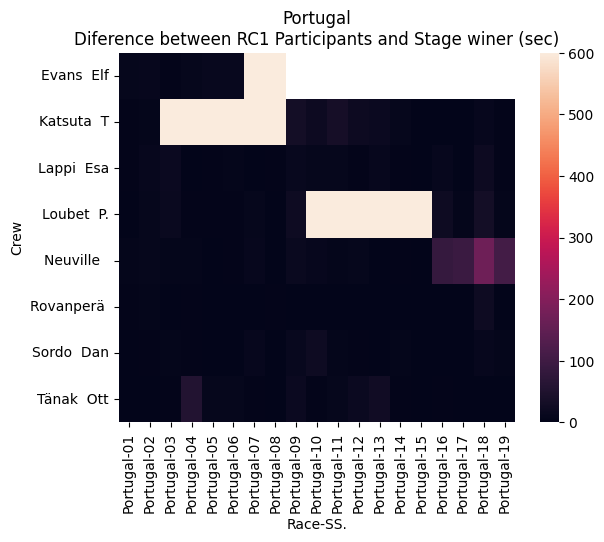

In [16]:
Heatmap_ALL = sns.heatmap(ss_times_F4)
plt.title(rallyname+'\nDiference between RC1 Participants and Stage winer (sec)')
plt.savefig("Heatmap_ALL.png")

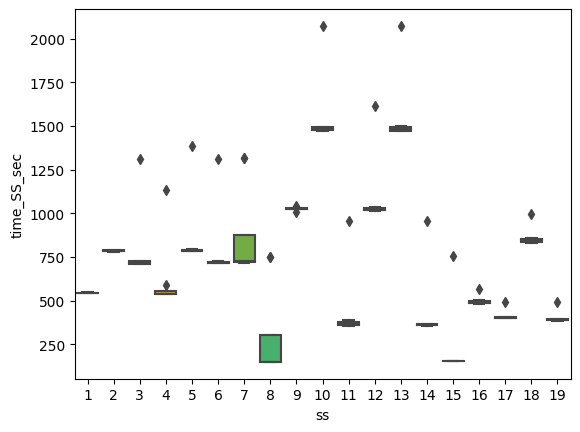

In [17]:
bplt=sns.boxplot( y=ss_times_WRC["time_SS_sec"], x=ss_times_WRC["ss"])

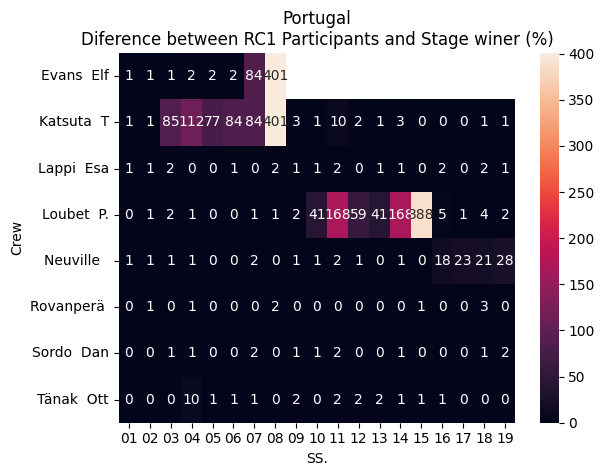

In [18]:
ss_timesa = pd.pivot_table(ss_times_WRC, values='diff%', 
                                index='Crew', 
                                columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesa, annot=True, fmt=',.0f')
plt.title(rallyname +'\nDiference between RC1 Participants and Stage winer (%)')
plt.savefig("Rc1.jpg")